<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing MLPs with Keras

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

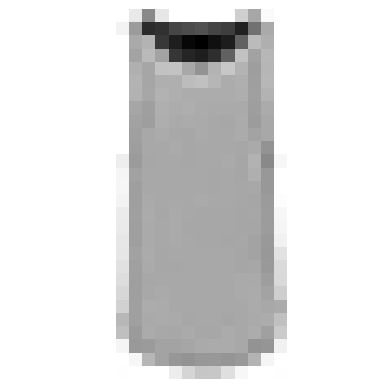

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap = "binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_train[0]

9

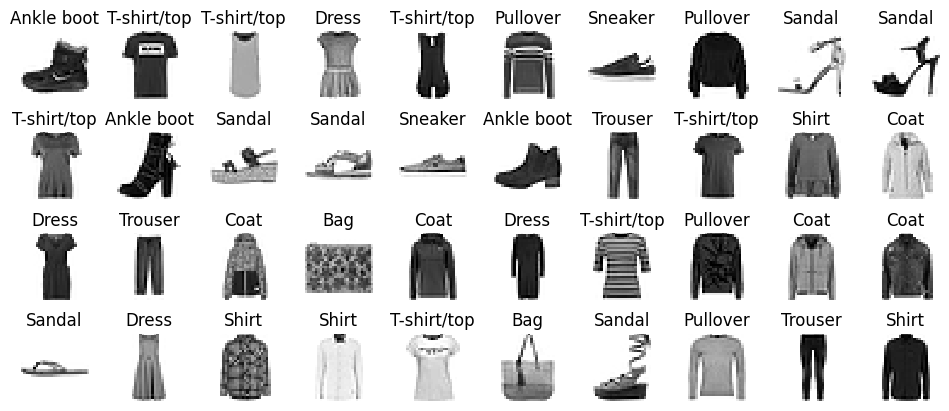

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

#Tensorflow Sequential API

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
# max(0, 17x + 7) --> relu acilisi

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784 * 300 + 300

235500

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

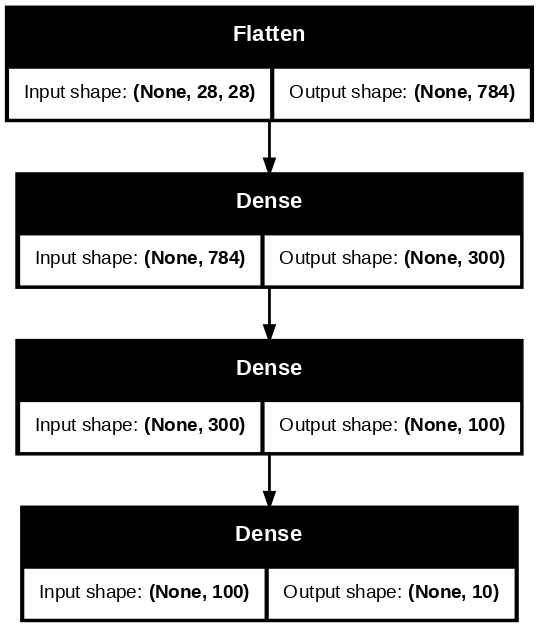

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04148554,  0.02081438,  0.01717844, ...,  0.04243363,
        -0.03182164,  0.00384101],
       [-0.05183095,  0.065062  , -0.0553106 , ...,  0.02525358,
         0.0692772 ,  0.00804717],
       [-0.02229309, -0.0125648 ,  0.06512871, ...,  0.04410765,
         0.01785725, -0.02519939],
       ...,
       [ 0.04682738, -0.04593008,  0.01917588, ...,  0.02927253,
        -0.07056251, -0.04594789],
       [ 0.04362634, -0.00618122,  0.01273406, ..., -0.02777461,
        -0.00186891,  0.04328711],
       [-0.06323487,  0.06039755, -0.01583283, ...,  0.01320846,
        -0.0736445 ,  0.00066131]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

#Compiling the model

In [ ]:
model.compile(
    loss = 'sparce_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
#bu iki kod bir birine beraberdi

In [ ]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes = 10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis = 1
)

array([0, 5, 1, 0])

#Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.9799 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.5048 - val_sparse_categorical_accuracy: 0.8320
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.5091 - sparse_categorical_accuracy: 0.8229 - val_loss: 0.4559 - val_sparse_categorical_accuracy: 0.8388
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.4557 - sparse_categorical_accuracy: 0.8411 - val_loss: 0.4321 - val_sparse_categorical_accuracy: 0.8456
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4246 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.4159 - val_sparse_categorical_accuracy: 0.8500
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4020 - sparse_categorical_accuracy: 0.8582 - val_loss: 0.4031 - val_sparse_categorical_accuracy: 0.8542
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3836 - sparse_categorical_accuracy: 0.8647 - val_loss: 0.3946 - val_sparse_categorical_accura

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [0.7097417116165161,
  0.4896027743816376,
  0.4441121220588684,
  0.41582930088043213,
  0.39472928643226624,
  0.37760859727859497,
  0.3632904887199402,
  0.35109326243400574,
  0.3402106463909149,
  0.33064040541648865,
  0.3215886354446411,
  0.3134763240814209,
  0.3060086667537689,
  0.2990381121635437,
  0.29264381527900696,
  0.2865052819252014,
  0.2806388735771179,
  0.2750949263572693,
  0.26981279253959656,
  0.2649720311164856,
  0.2600346803665161,
  0.2553320527076721,
  0.25072765350341797,
  0.24634474515914917,
  0.24212202429771423,
  0.2379610389471054,
  0.23391394317150116,
  0.22988468408584595,
  0.2261153906583786,
  0.22244974970817566],
 'sparse_categorical_accuracy': [0.7668181657791138,
  0.8293636441230774,
  0.8444908857345581,
  0.8531818389892578,
  0.8600909113883972,
  0.8659636378288269,
  0.871290922164917,
  0.8752545714378357,
  0.8788545727729797,
  0.8813636302947998,
  0.8849090933799744,
  0.8881636261940002,
  0.8901273012161255,
  

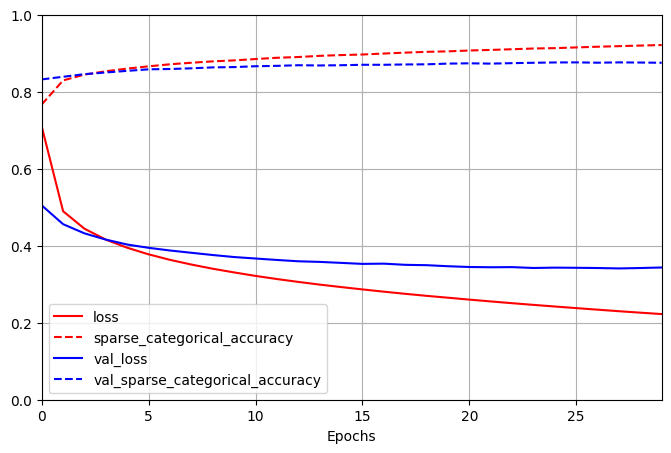

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5), xlim = [0, 29], ylim = [0, 1],
                                   grid = True, xlabel = 'Epochs',
                                   style = ['r-', 'r--', 'b-', 'b--'], label = True)
plt.legend()
plt.show()

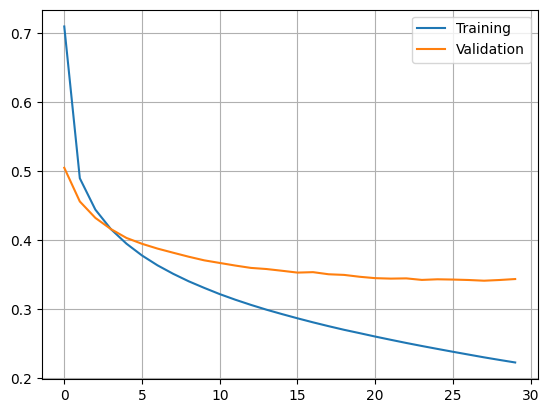

In [ ]:
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')

plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3656 - sparse_categorical_accuracy: 0.8729


[0.3597621023654938, 0.8748000264167786]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.01, 0.  , 0.83],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis = 1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(y_pred)

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
class_names[5]

'Sandal'

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

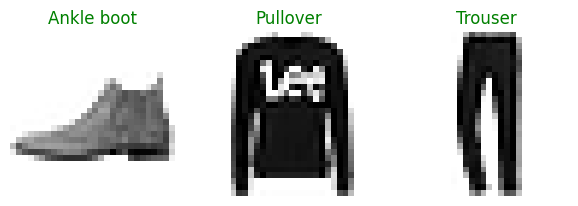

In [ ]:
plt.figure(figsize = (7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap = "binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(class_names[y_new[index]], fontsize = 12,
              color = 'g' if y_pred[index] == y_new[index] else 'r')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state = 42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')

])

norm_layer.adapt(X_train)
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['RootMeanSquaredError'])

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')

])

norm_layer.adapt(X_train)
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(),
              metrics = ['RootMeanSquaredError'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - RootMeanSquaredError: 1.2936 - loss: 1.7974 - val_RootMeanSquaredError: 0.6411 - val_loss: 0.4110
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6460 - loss: 0.4178 - val_RootMeanSquaredError: 0.8866 - val_loss: 0.7861
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6137 - loss: 0.3769 - val_RootMeanSquaredError: 1.1114 - val_loss: 1.2352
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6006 - loss: 0.3608 - val_RootMeanSquaredError: 1.2037 - val_loss: 1.4489
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5904 - loss: 0.3487 - val_RootMeanSquaredError: 1.4099 - val_loss: 1.9879
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.5835 - loss: 0.3406 - val_RootMeanSquaredError: 1.4730 - val_loss: 2.1697
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.5781 - lo

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [ ]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


array([[0.47775292]], dtype=float32)

#Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = [8])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

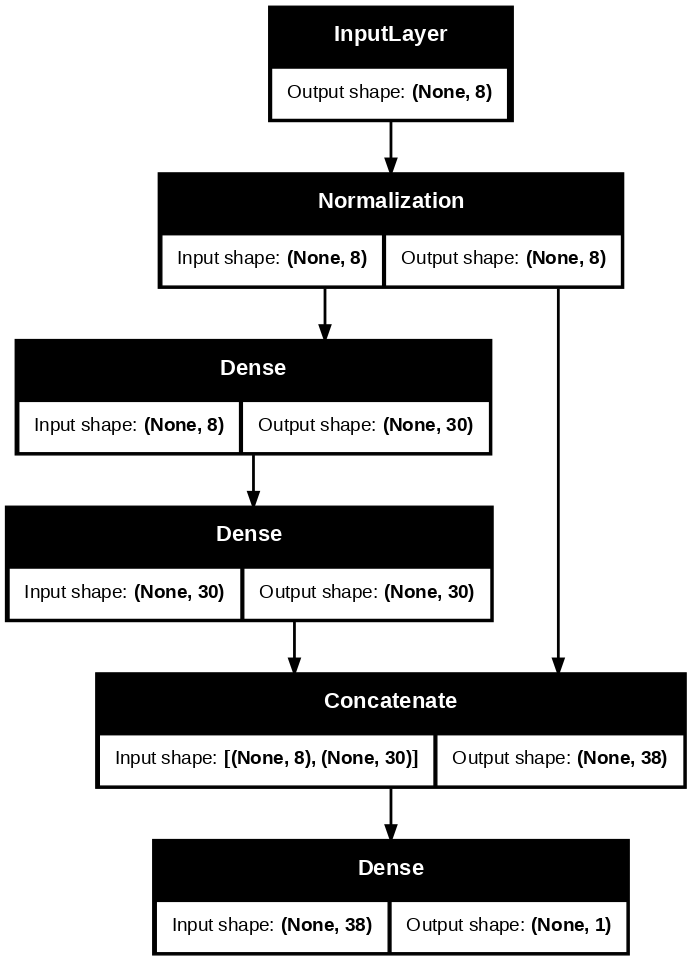

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['RootMeanSquaredError'])
model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: nan - loss: nan - val_RootMeanSquaredError: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━

In [ ]:
inpupt_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(inpupt_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [inpupt_wide, input_deep], outputs = [output])

In [ ]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics = ['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs = 20,
                    validation_data = ((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 1.6492 - loss: 2.8356 - val_RootMeanSquaredError: 0.7561 - val_loss: 0.5716
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 0.7203 - loss: 0.5192 - val_RootMeanSquaredError: 0.6505 - val_loss: 0.4231
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6703 - loss: 0.4495 - val_RootMeanSquaredError: 0.6973 - val_loss: 0.4862
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6426 - loss: 0.4131 - val_RootMeanSquaredError: 0.6021 - val_loss: 0.3626
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6260 - loss: 0.3920 - val_RootMeanSquaredError: 0.9823 - val_loss: 0.9649
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6158 - loss: 0.3793 - val_RootMeanSquaredError: 1.2993 - val_loss: 1.6881
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6098 - los

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 6)              │             13 │ input_layer_2[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 30)             │            210 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 5)              │             11 │ input_layer_1[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 30)             │            930 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 35)             │              0 │ normalization_1[0][0], │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             36 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,554 (13.89 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,354 (9.20 KB)

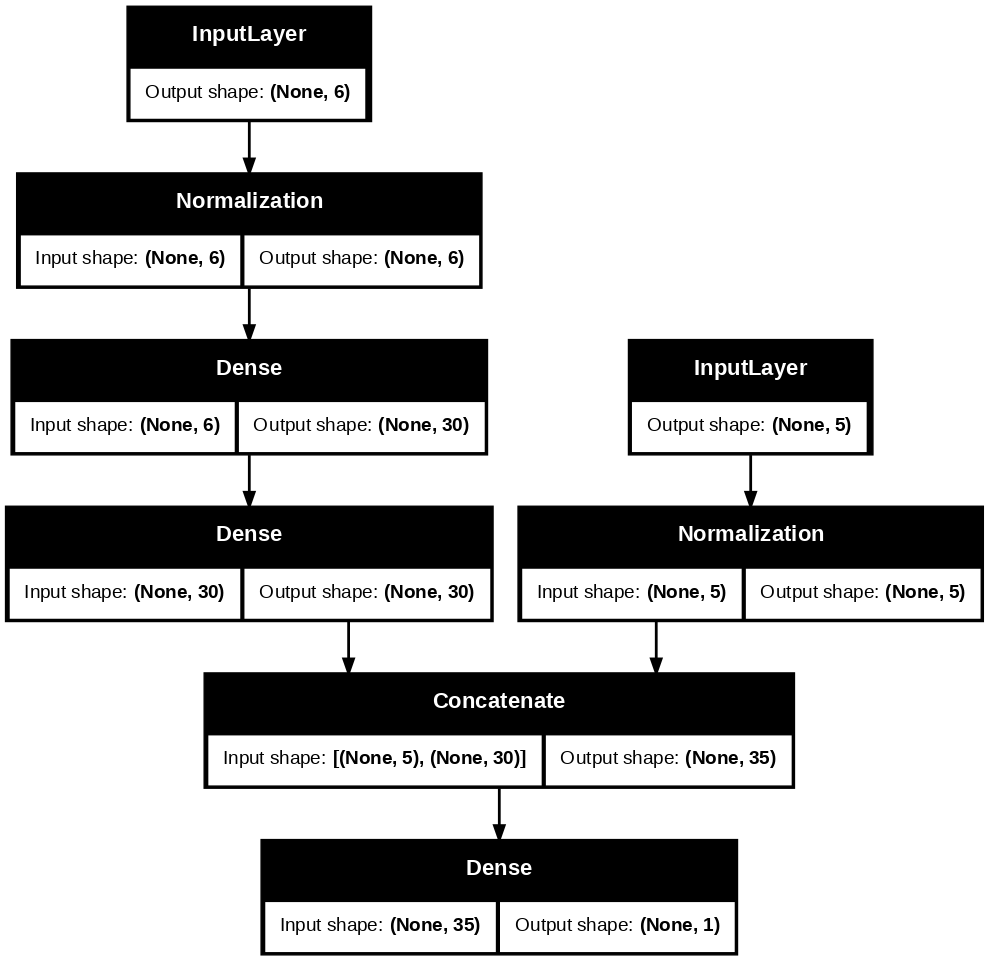

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
inpupt_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(inpupt_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output_layer = tf.keras.layers.Dense(1)(concat)
auxiliary_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs = [inpupt_wide, input_deep],
                       outputs = [output_layer, auxiliary_output])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)
model.compile(loss = ("mse", "mse"), loss_weights = (0.9, 0.1), optimizer = optimizer,
              metrics = ['RootMeanSquaredError', "RootMeanSquaredError"])

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs = 20,
                    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - dense_8_RootMeanSquaredError: 1.8826 - dense_8_loss: 3.6338 - dense_9_RootMeanSquaredError: 2.1928 - dense_9_loss: 4.8143 - loss: 3.7518 - val_dense_8_RootMeanSquaredError: 1.4623 - val_dense_8_loss: 2.1375 - val_dense_9_RootMeanSquaredError: 2.6024 - val_dense_9_loss: 6.7701 - val_loss: 2.6017
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dense_8_RootMeanSquaredError: 0.9326 - dense_8_loss: 0.8706 - dense_9_RootMeanSquaredError: 1.7642 - dense_9_loss: 3.1167 - loss: 1.0952 - val_dense_8_RootMeanSquaredError: 0.9185 - val_dense_8_loss: 0.8433 - val_dense_9_RootMeanSquaredError: 2.5944 - val_dense_9_loss: 6.7284 - val_loss: 1.4323
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dense_8_RootMeanSquaredError: 0.8215 - dense_8_loss: 0.6754 - dense_9_RootMeanSquaredError: 1.4728 - dense_9_loss: 2.1707 - loss: 0.8250 - val_dense_8_RootMeanSquaredError: 0.7656 - val_dense_8_loss: 0.5860 - val_dense_9_RootMeanSquaredError: 2.5

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_4           │ (None, 6)              │             13 │ input_layer_4[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 30)             │            210 │ normalization_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 5)              │             11 │ input_layer_3[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 30)             │            930 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 35)             │              0 │ normalization_3[0][0], │
│ (Concatenate)             │                        │                │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             36 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             31 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,233 (4.83 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2 (12.00 B)

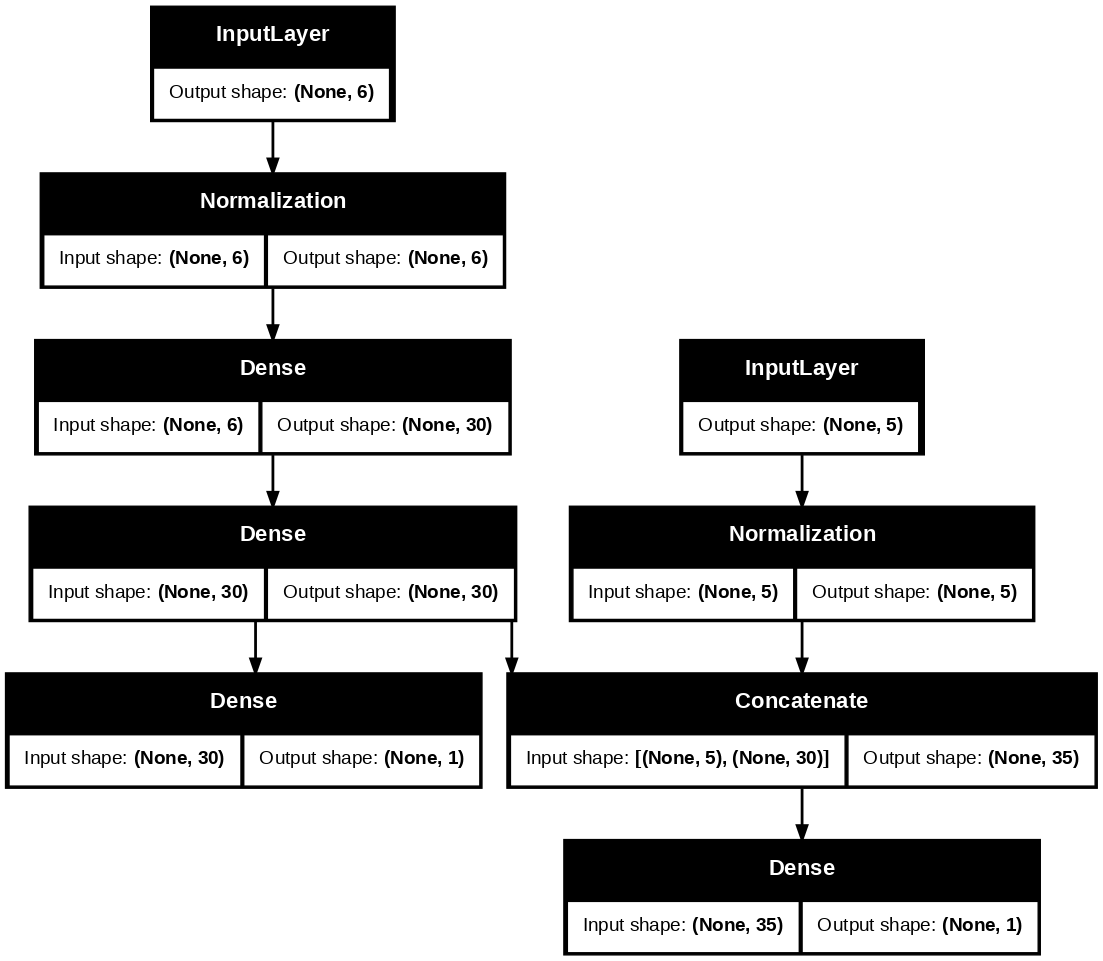

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

#Using the Subclassing API to Bouild Dynamic Models

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation = 'relu', name = 'my_cool_model')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = optimizer,
              metrics = ['RootMeanSquaredError', "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs = 10,
                    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - RootMeanSquaredError: 1.7672 - RootMeanSquaredError_1: 1.7879 - loss: 3.2451 - mse_loss: 3.2834 - val_RootMeanSquaredError: 0.8024 - val_RootMeanSquaredError_1: 2.2979 - val_loss: 1.1076 - val_mse_loss: 5.2778
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.7706 - RootMeanSquaredError_1: 0.9006 - loss: 0.6161 - mse_loss: 0.8119 - val_RootMeanSquaredError: 0.7932 - val_RootMeanSquaredError_1: 1.6734 - val_loss: 0.8463 - val_mse_loss: 2.7991
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.6955 - RootMeanSquaredError_1: 0.7869 - loss: 0.4975 - mse_loss: 0.6195 - val_RootMeanSquaredError: 0.7366 - val_RootMeanSquaredError_1: 0.9783 - val_loss: 0.5840 - val_mse_loss: 0.9567
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6597 - RootMeanSquaredError_1: 0.7417 - loss: 0.4469 - mse_loss: 0.5504 - val_RootMeanSquaredError: 0.6219 - val_RootMeanSquaredEr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


#Saving and Restoring a Model

In [ ]:
import shutil

shutil.rmtree("my_keras_model.keras", ignore_errors = True)

In [ ]:
model.save("my_keras_model.keras")

In [ ]:
model = tf.keras.models.load_model("/content/my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [ ]:
y_pred_main

array([[0.54004025],
       [1.6512836 ],
       [3.483311  ]], dtype=float32)

#Using Callbacks

In [ ]:
import shutil

shutil.rmtree('my_checkpoints', ignore_errors = True)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.keras', save_best_only = True,
                                                   save_weights_only = False, save_freq = 'epoch')
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs = 10,
                    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - RootMeanSquaredError: 0.5939 - RootMeanSquaredError_1: 0.6579 - loss: 0.3608 - mse_loss: 0.4330 - val_RootMeanSquaredError: 0.7797 - val_RootMeanSquaredError_1: 0.7244 - val_loss: 0.5996 - val_mse_loss: 0.5247
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5880 - RootMeanSquaredError_1: 0.6484 - loss: 0.3533 - mse_loss: 0.4205 - val_RootMeanSquaredError: 0.6626 - val_RootMeanSquaredError_1: 0.7806 - val_loss: 0.4561 - val_mse_loss: 0.6093
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5838 - RootMeanSquaredError_1: 0.6412 - loss: 0.3480 - mse_loss: 0.4113 - val_RootMeanSquaredError: 0.6345 - val_RootMeanSquaredError_1: 0.6466 - val_loss: 0.4042 - val_mse_loss: 0.4181
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.5808 - RootMeanSquaredError_1: 0.6352 - loss: 0.3441 - mse_loss: 0.4036 - val_RootMeanSquaredError: 0.6176 - val_RootMeanSquaredEr

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs = 100,
                    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5671 - RootMeanSquaredError_1: 0.6102 - loss: 0.3268 - mse_loss: 0.3724 - val_RootMeanSquaredError: 1.1374 - val_RootMeanSquaredError_1: 1.2331 - val_loss: 1.3163 - val_mse_loss: 1.5199
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5671 - RootMeanSquaredError_1: 0.6087 - loss: 0.3266 - mse_loss: 0.3707 - val_RootMeanSquaredError: 1.4295 - val_RootMeanSquaredError_1: 2.0619 - val_loss: 2.2643 - val_mse_loss: 4.2492
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5682 - RootMeanSquaredError_1: 0.6141 - loss: 0.3284 - mse_loss: 0.3774 - val_RootMeanSquaredError: 1.4288 - val_RootMeanSquaredError_1: 1.6528 - val_loss: 2.1105 - val_mse_loss: 2.7304
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5694 - RootMeanSquaredError_1: 0.6109 - loss: 0.3293 - mse_loss: 0.3734 - val_RootMeanSquaredError: 1.1256 - val_RootMeanSquar